## 한글폰트

In [45]:
# 한글폰트 사용 in colab
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


INFO:matplotlib.font_manager:generated new fontManager


In [46]:
pip install yfinance

## Step 0 데이터 수집 : Yahoo Finance 데이터 불러오기

In [47]:
%matplotlib inline
import pandas as pd
import numpy as np
import yfinance as yf

gs_df = yf.download('078930.KS',
                      start='2020-06-05',
                      end='2021-11-05',
                      progress=False)

gs_df = gs_df[["Close"]]

gs_df = gs_df.reset_index()

gs_df.columns = ['day', 'price']

gs_df['day'] = pd.to_datetime(gs_df['day'])

gs_df.index = gs_df['day']
gs_df.set_index('day', inplace=True)

gs_df

,price
day,
2020-06-05,40250.0
2020-06-08,40500.0
2020-06-09,40400.0
2020-06-10,39650.0
2020-06-11,38500.0
...,...
2021-11-01,42500.0
2021-11-02,43450.0
2021-11-03,42700.0


## Step 1 탐색 : 시간정보가 포함된 데이터 살펴보기

In [48]:
gs_train_df = gs_df[:347]
gs_train_df

,price
day,
2020-06-05,40250.0
2020-06-08,40500.0
2020-06-09,40400.0
2020-06-10,39650.0
2020-06-11,38500.0
...,...
2021-10-25,44350.0
2021-10-26,44050.0
2021-10-27,43800.0


In [49]:
gs_test_df = gs_df[347:]
gs_test_df

,price
day,
2021-11-01,42500.0
2021-11-02,43450.0
2021-11-03,42700.0
2021-11-04,42800.0
2021-11-05,42150.0


### 시각화

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51452 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44032 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 51452 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 44032 missing from current font.



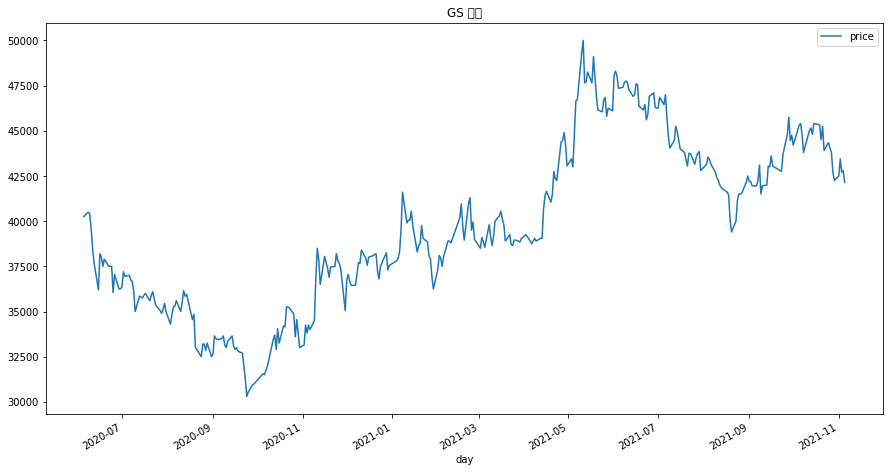

In [50]:
fig, ax = plt.subplots(figsize=(15, 8))
gs_df.plot(ax=ax)

plt.title("GS 주가")
plt.show()

## Step 2 예측 : 파이썬 라이브러리를 활용한 시세 예측

### Model 1 : ARIMA

In [51]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# AR, 차분, MA 파라미터로 ARIMA 모델을 학습한다.
model = ARIMA(gs_train_df.price.values, order = (1,2,2))
model_fit = model.fit(trend = 'nc', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  345
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -2779.250
Method:                       css-mle   S.D. of innovations            755.697
Date:                Thu, 11 Nov 2021   AIC                           5566.500
Time:                        04:36:53   BIC                           5581.875
Sample:                             2   HQIC                          5572.623
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D2.y     0.5332      0.260      2.050      0.041       0.023       1.043
ma.L1.D2.y    -1.6353      0.239     -6.831      0.000      -2.104      -1.166
ma.L2.D2.y     0.6353      0.239      2.663      0.0

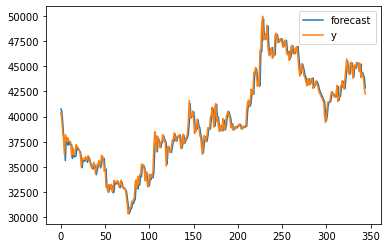

In [52]:
# 학습 데이터에 대한 예측 결과

fig = model_fit.plot_predict()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49892 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51228 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44050 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44284 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50696 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 52769 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51032 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

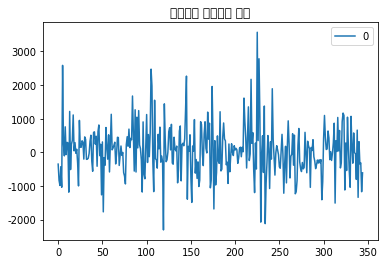

In [53]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title = "실제값과 예측값의 잔차")

In [54]:
forecast_data = model_fit.forecast(steps=5)

In [55]:
# 마지막 5일의 예측 데이터
pred_arima_y = forecast_data[0].tolist()

# 실제 5일의 데이터
test_y = gs_test_df.price.values

# 마지막 5일의 예측 데이터 최소값
pred_y_lower = []
# 마지막 5일의 예측 데이터 최대값
pred_y_upper = []

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44050 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48708 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44368 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50696 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 52769 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 52572 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51200 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

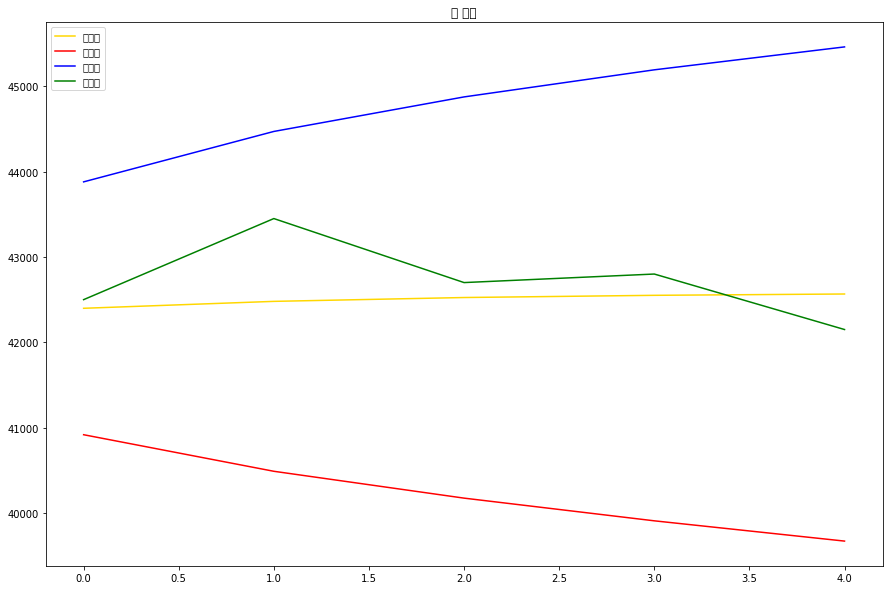

In [56]:
plt.figure(figsize=(15, 10))

# 모델이 예측한 가격 그래프
plt.plot(pred_arima_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['예측값', '최저값','최대값','실제값'])
plt.title("값 비교")
plt.show()

### Model 2 : Facebook Prophet

In [57]:
from fbprophet import Prophet


gs_df = gs_df.reset_index()

gs_df.columns = ['ds', 'y']

gs_train_df = gs_df[:347]
gs_test_df = gs_df[347:]

In [58]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)

prophet.fit(gs_train_df)

In [59]:
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
347,2021-10-30,36327.358002,35526.236591,37185.392062
348,2021-10-31,36044.655520,35151.438854,36855.499812
349,2021-11-01,41614.405694,40702.370784,42520.371026
350,2021-11-02,41598.960537,40712.535957,42506.826868
351,2021-11-03,41423.115895,40518.339513,42391.601013


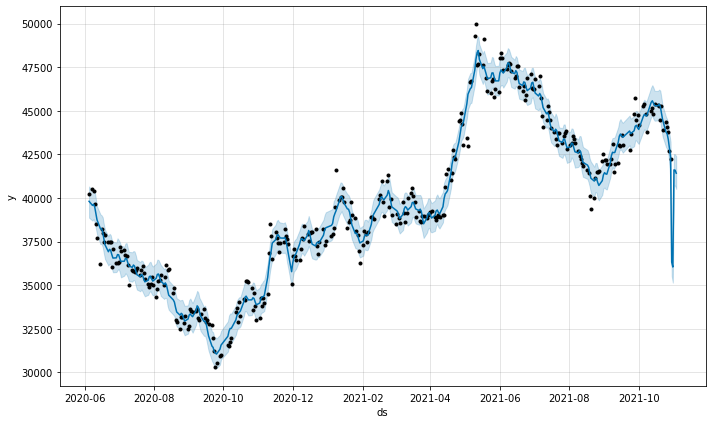

In [60]:
fig1 = prophet.plot(forecast_data)

# 검은 점 : 실제 가격.
# 파란 선 : 예측 가격.

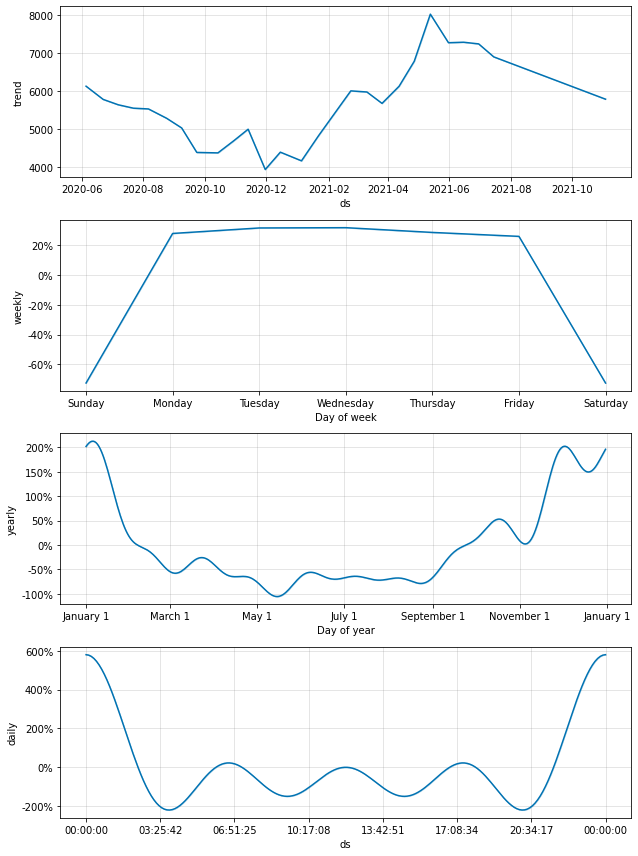

In [61]:
# 트렌드 정보 시각화 그래프.
fig2 = prophet.plot_components(forecast_data)

Text(0.5, 1.0, '값 비교')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44050 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48708 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44368 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 44050 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 48708 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 44368 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50696 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

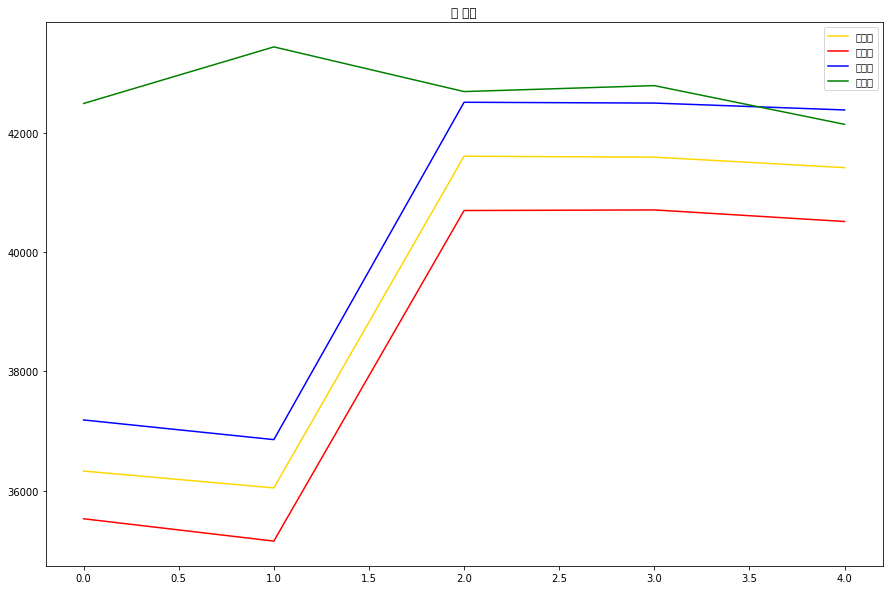

In [62]:
# Testset 평가
plt.figure(figsize=(15, 10))

# 마지막 5일의 예측 데이터 (2021-04-15 ~ 2021-04-19)
pred_fbprophet_y = forecast_data.yhat.values[-5:]

# 실제 5일의 데이터 (2021-04-15 ~ 2021-04-19)
test_y = gs_test_df.y.values

# 마지막 5일의 예측 데이터 최소값
pred_y_lower = forecast_data.yhat_lower.values[-5:]
# 마지막 5일의 예측 데이터 최대값
pred_y_upper = forecast_data.yhat_upper.values[-5:]

# 모델이 예측한 가격 그래프
plt.plot(pred_fbprophet_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['예측값', '최저값','최대값','실제값'])
plt.title("값 비교")

## Step 3 활용 : 더 나은 결과를 위한 방법

### 첫 번째 : 상한값, 하한값을 지정.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



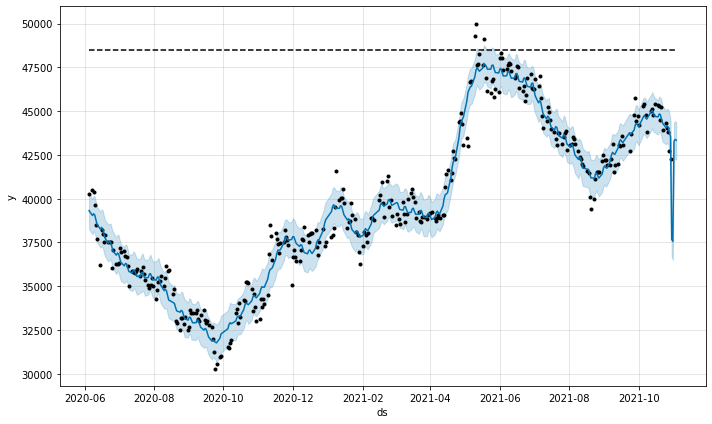

In [66]:
# 상한가 설정
gs_train_df['cap'] = 48500

# 상한가 적용을 위한 파라미터를 다음과 같이 설정
prophet = Prophet(seasonality_mode = 'multiplicative',
                 growth = 'logistic',
                 yearly_seasonality = True,
                 weekly_seasonality = True, 
                 daily_seasonality = True,
                 changepoint_prior_scale = 0.5)

prophet.fit(gs_train_df)

# 5일 예측 
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')

# 상한가 설정
future_data['cap'] = 48500
forecast_data = prophet.predict(future_data)

fig = prophet.plot(forecast_data)

### 두 번째 : 이상치 제거

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



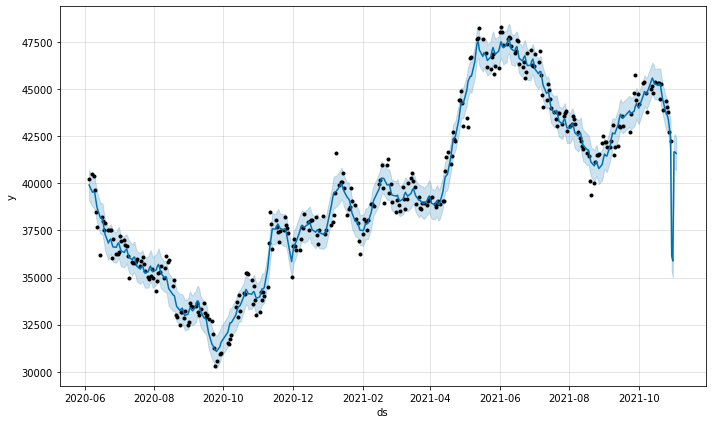

In [67]:
gs_train_df.loc[gs_train_df['y'] > 48500, 'y'] = None

# prophet 모델 학습
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality = True,
                 weekly_seasonality = True,
                 daily_seasonality = True,
                 changepoint_prior_scale = 0.5)

prophet.fit(gs_train_df)

# 5일 예측 
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')

forecast_data = prophet.predict(future_data)

fig = prophet.plot(forecast_data)

In [68]:
pred_fbprophet_y_1 = forecast_data.yhat.values[-5:]

## Step 4 : Model 평가

### RMSE (Root Mean Square Error, 평균 제곱근 오차)

In [71]:
df = pd.DataFrame({'ARIMA 예측값':pred_arima_y,
                   'FBprophet 예측값':  pred_fbprophet_y,
                   'FBprophet 이상치 제거 후(48500) 예측값':pred_fbprophet_y_1,
                   '실제값':test_y})

df

,ARIMA 예측값,FBprophet 예측값,FBprophet 이상치 제거 후(48500) 예측값,실제값
0,42398.786677,36327.358002,36142.713155,42500.0
1,42479.891544,36044.655520,35878.442321,43450.0
2,42524.907063,41614.405694,41675.620847,42700.0
3,42550.678991,41598.960537,41654.263653,42800.0
4,42566.189836,41423.115895,41586.682627,42150.0


Text(0.5, 1.0, '값 비교')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44050 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48708 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44368 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 44050 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 48708 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 44368 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50696 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

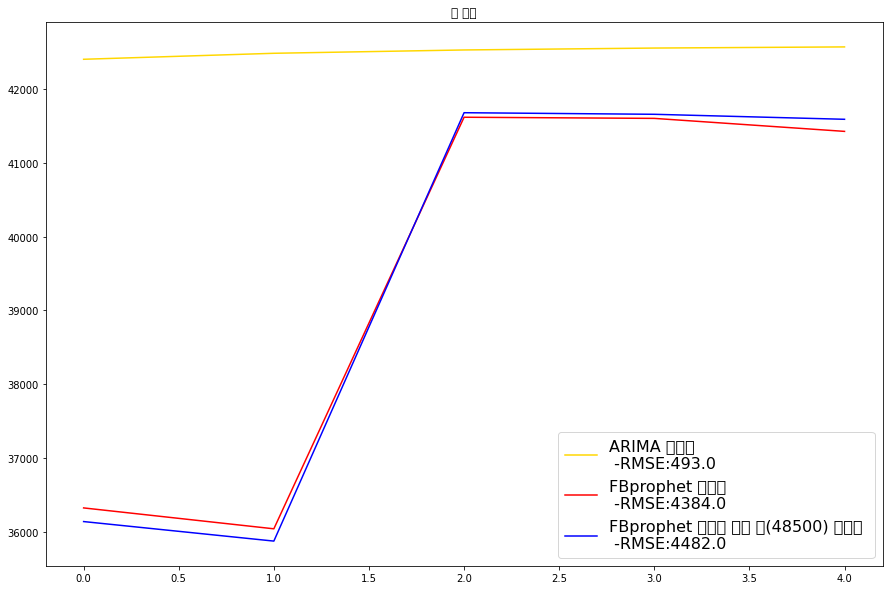

In [72]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

plt.figure(figsize=(15, 10))

# arima 모델의  rmse
rmse_arima = sqrt(mean_squared_error(pred_arima_y, test_y))

# fbprophet 모델의  rmse
rmse_fbprophet = sqrt(mean_squared_error(pred_fbprophet_y, test_y))

# 전처리 진행한 fbprophet 모델의  rmse
rmse_fbprophet_1 = sqrt(mean_squared_error(pred_fbprophet_y_1, test_y))

# 모델이 예측한 가격 그래프
plt.plot(df[['ARIMA 예측값']], color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(df[['FBprophet 예측값']], color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(df[['FBprophet 이상치 제거 후(48500) 예측값']], color = 'blue')

# 실제 가격 그래프
# plt.plot(test_y, color = 'green')

plt.rc('legend', fontsize=16)
plt.legend(['ARIMA 예측값 \n -RMSE:' + str(round(rmse_arima,0)), 
            'FBprophet 예측값  \n -RMSE:' + str(round(rmse_fbprophet,0)),
            'FBprophet 이상치 제거 후(48500) 예측값 \n -RMSE:' + str(round(rmse_fbprophet_1,0))])
plt.title("값 비교")